In [ ]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

In [3]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [4]:
# c = twint.Config()
# c.Search = '#verstappen'
# c.Limit = 5
# twint.run.Search(c)

In [5]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [6]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(text):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", text)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    
    # usuwanie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    # tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    # tworzenie listy stop słów
    stop_words = set(stopwords.words('english'))
    
    # stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stop_words]
    
    return stemmed_tokens

In [7]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [ ]:
# Pobranie danych z Twittera, 50 tweetów
#data1 = get_data("#climatechange -filter:retweets", 50)
#data2 = get_data("#globalwarming -filter:retweets", 50)

In [ ]:
# Oczyszczenie tweetów
#clean_data1 = [cleaned_tweets(tweet) for tweet in data1['tweet']]
#clean_data2 = [cleaned_tweets(tweet) for tweet in data2['tweet']]

In [ ]:
# Połączenie tweetów w jedną listę
#all_data = clean_data1 + clean_data2

In [8]:
#Pobranie danych dla obu grup tweetów
group1_tweets = get_data('climate change', 1000)
group2_tweets = get_data('global warming', 1000)

1640362207484723201 2023-03-27 16:36:41 +0200 <nichpic> @Jason Democrat party is moderate. What they want to give you healthcare and education and believe in climate change and equality. Oh no how radical!  Lol
1640362205811032066 2023-03-27 16:36:40 +0200 <PeteSikora1> Ending gas in new construction: ✅saves money  ✅creates jobs ✅fights climate change ✅prevents child asthma It’s also politically popular, as the fossil fuel industry’s own polling shows.  https://t.co/QVjGc31Olz
1640362202841636866 2023-03-27 16:36:40 +0200 <psdmccartney> at least they're fighting climate change with that mask on!
1640362161942740994 2023-03-27 16:36:30 +0200 <TurinGorthol> @wierdduk liveable land is shrinking due to climate change? Rare stelling, wel door massaimmigratie.
1640362160202104832 2023-03-27 16:36:30 +0200 <LeeTheUnderdog> @laurenboebert Here's your climate change  https://t.co/WwlYldjnbU
1640362157182185472 2023-03-27 16:36:29 +0200 <ClimatChristo> #Adaptation will be easy peasy, as mentione

In [9]:
#Oczyszczenie tweetów
group1_cleaned = [cleaned_tweets(tweet) for tweet in group1_tweets['tweet']]
group2_cleaned = [cleaned_tweets(tweet) for tweet in group2_tweets['tweet']]

group1_words = set([word for tweet in group1_cleaned for word in tweet])
group2_words = set([word for tweet in group2_cleaned for word in tweet])

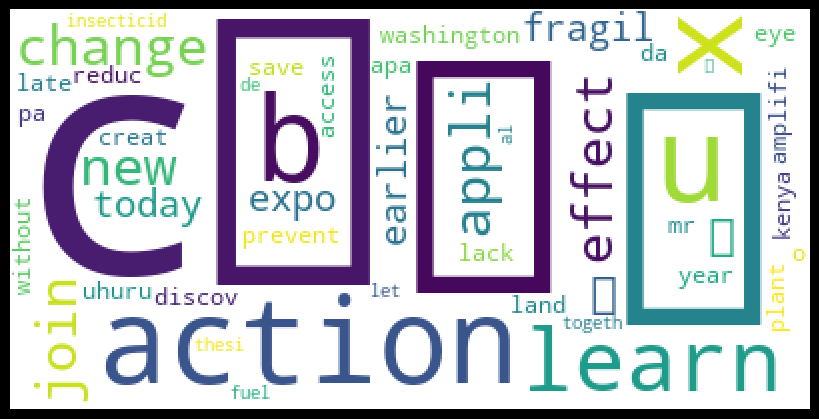

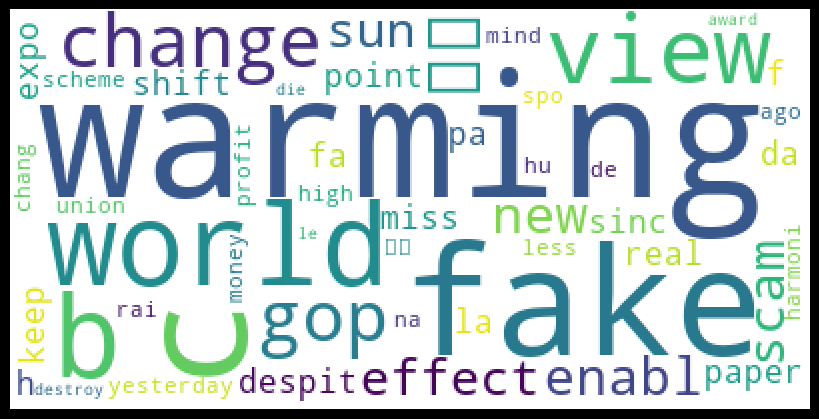

In [10]:
#Wygenerowanie chmury słów
generate_wordcloud(' '.join(group1_words))
generate_wordcloud(' '.join(group2_words))

In [11]:
#Przygotowanie chmury słów na podstawie bag-of-words dla dwóch tekstów traktowanych jako jeden
group1_articles = get_data('climate change', 1000)
group2_articles = get_data('global warming', 1000)

corpus = group1_articles + group2_articles

1640363510369599489 2023-03-27 16:41:52 +0200 <anderssandberg> @KarimJebari @JimDMiller @OHaggstrom This is a bit like how climate change used to be (and to some extent still is): many incentives to ignore problem, relevant disagreements even among experts, plus loud minorities with extreme points of view.
1640363507026624514 2023-03-27 16:41:51 +0200 <AngelicoDeb> @harford117 @laurenboebert She mocks climate change.. by saying yes I believe in climate change it changes four times a year..
1640363474847932418 2023-03-27 16:41:43 +0200 <UniUtrecht> The #dies honorary doctorates have been awarded to @clequere and @SISeneviratne. With the honorary doctorates, Utrecht University honours their outstanding contribution to science, policy and society in the fight against climate change. Congratulations! 🎉 https://t.co/vrj3pkQ3WH
1640363464441970691 2023-03-27 16:41:41 +0200 <marillion13> Toxic Blue-Green Algae Can Be Fatal To Dogs. Here's How to Avoid It, it´s a "side effect" of the #ClimateC

In [12]:
#Oczyszczenie tweetów z całego korpusu
corpus_cleaned = [cleaned_tweets(article) for article in corpus]

group1_words = set([word for article in corpus_cleaned[:5] for word in article])
group2_words = set([word for article in corpus_cleaned[5:] for word in article])

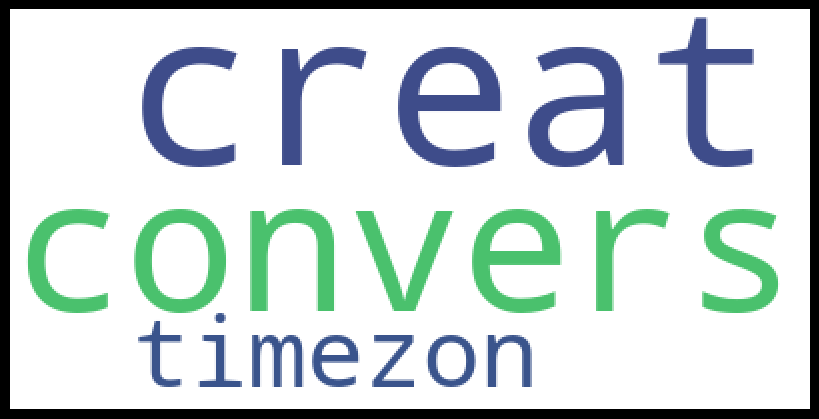

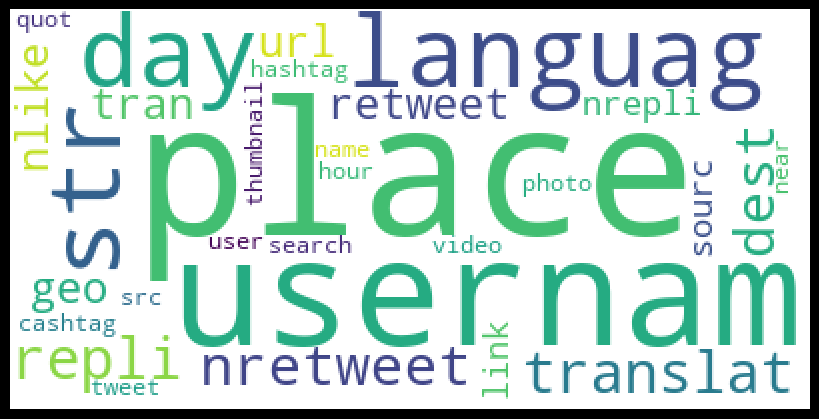

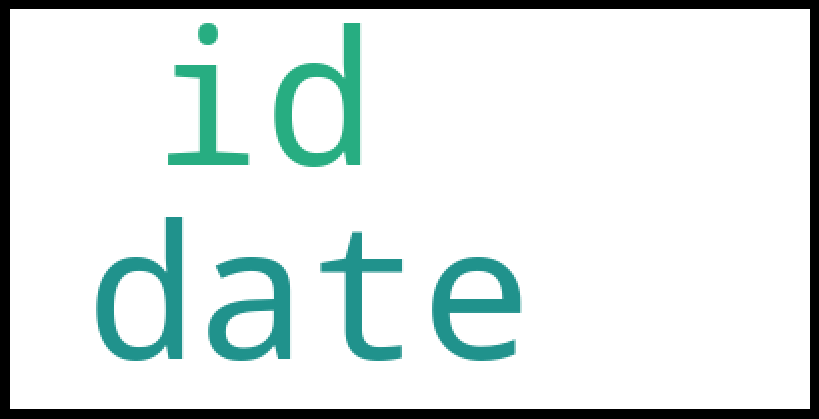

In [13]:
unique_group1_words = group1_words - group2_words
unique_group2_words = group2_words - group1_words
common_words = group1_words.intersection(group2_words)

generate_wordcloud(' '.join(unique_group1_words))
generate_wordcloud(' '.join(unique_group2_words))
generate_wordcloud(' '.join(common_words))